In [1]:
import geopandas as gpd

In [2]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")

In [3]:
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


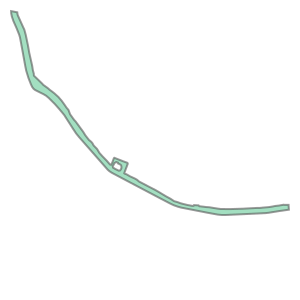

In [5]:
fields["geometry"].iloc[0]

In [6]:
type(fields["geometry"].iloc[0])

shapely.geometry.polygon.Polygon

In [7]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

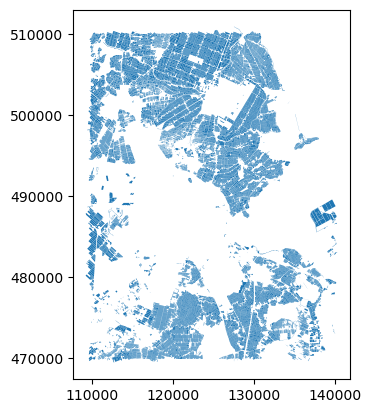

In [8]:
fields.plot()

In [12]:
xmin, xmax = (115_000, 140_000)
ymin, ymax = (480_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)

In [13]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)

<Axes: >

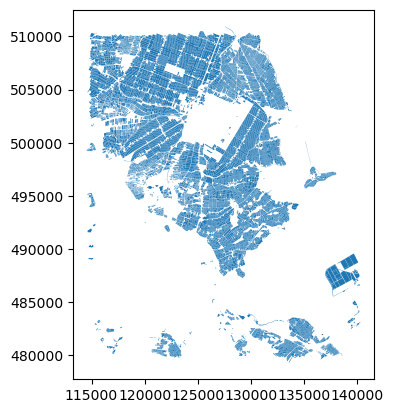

In [14]:
fields.plot()

In [15]:
fields_cx = fields.cx[120_000:135_000, 485_000:500_000]

In [21]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120159.250 49..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120102.674 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119859.714 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120168.535 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119949.971 49..."
...,...,...,...,...,...,...
11834,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133379.924 49..."
11835,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133426.347 49..."
11836,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133587.600 49..."
11837,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133481.442 49..."


<Axes: >

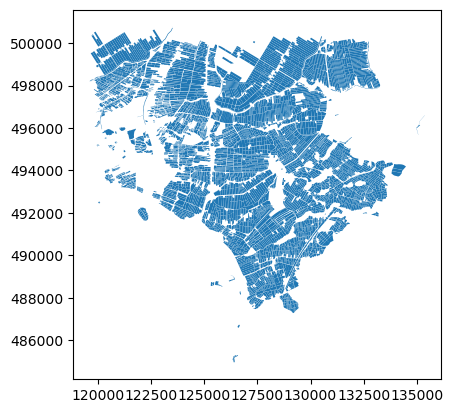

In [16]:
fields_cx.plot()

In [18]:
fields_rect = fields.clip_by_rect(120_000, 485_000, 135_000, 500_000)

In [20]:
type(fields_rect)

geopandas.geoseries.GeoSeries

In [17]:
fields.clip_by_rect?

Signature: fields.clip_by_rect(xmin, ymin, xmax, ymax)
Docstring:
Returns a ``GeoSeries`` of the portions of geometry within the given
rectangle.

Note that the results are not exactly equal to
:meth:`~GeoSeries.intersection()`. E.g. in edge cases,
:meth:`~GeoSeries.clip_by_rect()` will not return a point just touching the
rectangle. Check the examples section below for some of these exceptions.

The geometry is clipped in a fast but possibly dirty way. The output is not
guaranteed to be valid. No exceptions will be raised for topological errors.

Note: empty geometries or geometries that do not overlap with the specified
bounds will result in ``GEOMETRYCOLLECTION EMPTY``.

Parameters
----------
xmin: float
    Minimum x value of the rectangle
ymin: float
    Minimum y value of the rectangle
xmax: float
    Maximum x value of the rectangle
ymax: float
    Maximum y value of the rectangle

Returns
-------
GeoSeries

Examples
--------
>>> from shapely.geometry import Polygon, LineString,

<Axes: >

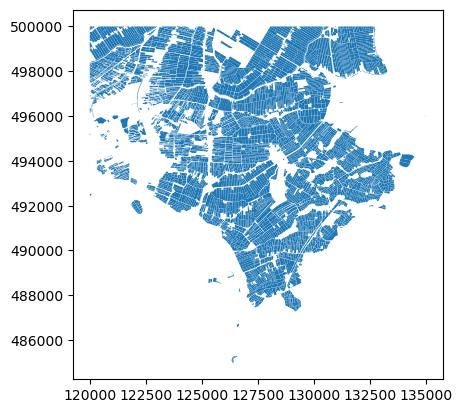

In [22]:
fields_rect.plot()

(499000.0, 500500.0)

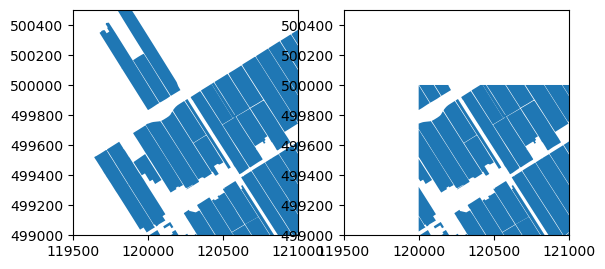

In [29]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2)

fields_cx.plot(ax=ax[0])
ax[0].set_xlim([119500, 121000])
ax[0].set_ylim([499000, 500500])

fields_rect.plot(ax=ax[1])
ax[1].set_xlim([119500, 121000])
ax[1].set_ylim([499000, 500500])

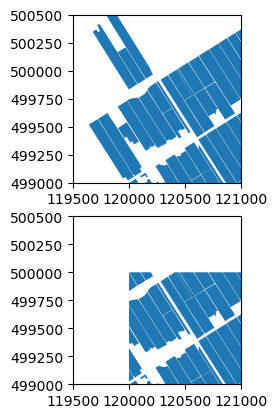

In [27]:
fig

In [28]:
ax

array([<Axes: >, <Axes: >], dtype=object)

In [31]:
fields_temp = fields.copy()

In [32]:
fields_temp["geometry"] = fields_rect

In [34]:
fields_temp.shape

(11839, 6)

In [35]:
fields_rect.shape

(11839,)

In [38]:
fields_rect[~fields_rect.is_empty].shape

(4872,)

In [40]:
fields_temp[~fields_temp.is_empty].shape

(4872, 6)

In [42]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120159.250 49..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120102.674 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119859.714 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120168.535 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119949.971 49..."
...,...,...,...,...,...,...
11834,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133379.924 49..."
11835,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133426.347 49..."
11836,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133587.600 49..."
11837,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133481.442 49..."


In [46]:
fields_cx.to_file("results/fields_cropped.gpkg")